## Installation needed

In [1]:
# !pip install tensorflow
# !pip install opencv-python
# !pip install keras

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('dark_background')
import seaborn as sns
from tqdm import tqdm

import cv2
import os
import tensorflow as tf
import sklearn as sk

import warnings
warnings.filterwarnings('ignore')

print('Using Tensorflow version:', tf.__version__)

Using Tensorflow version: 2.4.1


In [3]:
main_data = pd.read_csv('data_labels_mainData.csv')
extra_data = pd.read_csv('data_labels_extraData.csv')

In [4]:
main_data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [5]:
extra_data

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [6]:
from sklearn.model_selection import train_test_split
X = main_data['ImageName']
y = main_data['cellType']

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.33)

train_Y = train_Y.ravel()

In [7]:
def create_train_data(directory, img_list):
    IMAGE_SIZE = 27
    train_data = []
    for img in tqdm(img_list, desc='Extracting Image Progress'):
        path = os.path.join(directory, img)
        img = cv2.resize(cv2.imread(path), (IMAGE_SIZE,IMAGE_SIZE))
        train_data.append(np.array(img))
    print("Successfully import images!")
    # Convert to np.array and normalize pixel values to be between 0 and 1 
    return np.array(train_data) / 255.0 

In [8]:
# CHANGE THE PATH TO IMAGE FOLDER IN YOUR LOCAL DEVICE!
path = r"C:\Users\luong\Documents\GitHub\ML\Asm\ASM2\patch_images"

train_X_img = create_train_data(path, train_X.tolist())
test_X_img = create_train_data(path, test_X.tolist())

Extracting Image Progress:  22%|███████████                                       | 719/3266 [00:00<00:00, 7119.97it/s]

Successfully import images!


Extracting Image Progress: 100%|█████████████████████████████████████████████████| 3266/3266 [00:00<00:00, 7181.42it/s]

Successfully import images!


In [9]:
train_X_img 

array([[[[0.6627451 , 0.37647059, 0.63529412],
         [0.69411765, 0.39215686, 0.65882353],
         [0.67058824, 0.39607843, 0.65882353],
         ...,
         [0.8627451 , 0.65882353, 0.87843137],
         [0.85882353, 0.6627451 , 0.87058824],
         [0.76862745, 0.55686275, 0.77254902]],

        [[0.69019608, 0.40392157, 0.6745098 ],
         [0.60784314, 0.25490196, 0.53333333],
         [0.54509804, 0.23529412, 0.51372549],
         ...,
         [0.77647059, 0.57647059, 0.78039216],
         [0.85098039, 0.67058824, 0.8627451 ],
         [0.90980392, 0.72941176, 0.92941176]],

        [[0.67843137, 0.41568627, 0.69019608],
         [0.55686275, 0.24705882, 0.53333333],
         [0.52156863, 0.25490196, 0.53333333],
         ...,
         [0.76470588, 0.57647059, 0.77647059],
         [0.86666667, 0.6627451 , 0.86666667],
         [0.99215686, 0.78431373, 0.95686275]],

        ...,

        [[0.58039216, 0.24313725, 0.4627451 ],
         [0.5254902 , 0.20392157, 0.43137255]

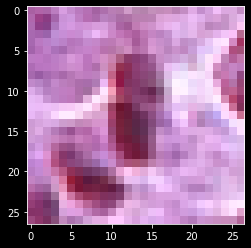

In [10]:
plt.imshow(train_X_img[0])

## VGG16

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
model = Sequential()

model.add(Conv2D(input_shape=(27,27,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [35]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [45]:
from tensorflow.keras.optimizers import Adam

opt = Adam(lr=0.000001)
model.compile(optimizer = opt , 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , 
              metrics = ['accuracy'])


In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 27, 27, 64)        1792      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 6, 6, 256)        

In [40]:
train_X_img.shape

(6630, 27, 27, 3)

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", 
                             monitor='val_acc',
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

hist = model.fit(x=train_X_img ,y=train_Y, batch_size = 32, epochs = 15, callbacks=[early,checkpoint])

Epoch 1/15


InvalidArgumentError:  Received a label value of 3 which is outside the valid range of [0, 2).  Label values: 2 1 0 2 0 1 0 3 2 2 2 2 2 2 0 0 3 1 2 1 1 1 2 0 0 2 3 3 0 2 0 2
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-46-09aab7fbdee8>:11) ]] [Op:__inference_train_function_4977]

Function call stack:
train_function
